In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


In [3]:
iris=pd.read_csv(r'C:\Users\user\Desktop\Iris (1).csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

In [9]:
iris['Species']=le.fit_transform(iris['Species'])

In [10]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
iris.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [12]:
iris.isnull().apply(pd.value_counts).T

,False
Id,150
SepalLengthCm,150
SepalWidthCm,150
PetalLengthCm,150
PetalWidthCm,150
Species,150


In [13]:
iris.shape

(150, 6)

In [14]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [15]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int32
dtype: object

In [16]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [17]:
iris.drop(['Id'],axis=1,inplace=True)

In [18]:
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [19]:
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','PetalWidthCm']]
y= iris[['Species']]

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Entropy or Shanon Entropy

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2)
model

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [25]:
y_pred=model.predict(X_test)

In [26]:
model.score(X_train,y_train)*100

96.19047619047619

In [27]:
model.score(X_test,y_test)*100

95.55555555555556

In [28]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [30]:
cf =confusion_matrix(y_test,y_pred)
cf

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

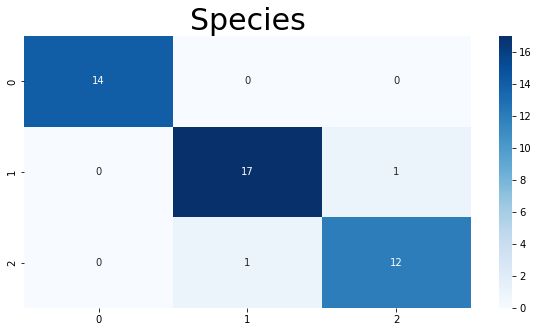

In [31]:
plt.figure(figsize=(10,5))
sns.heatmap(cf,fmt='g',cmap='Blues',annot=True)
plt.title('Species',fontsize=30)
plt.show()

#  Ginni impurity

In [32]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=2)
model1

DecisionTreeClassifier(max_depth=2)

In [33]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [34]:
y_pred1=model1.predict(X_test)
y_pred1

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [35]:
model1.score(X_train,y_train)*100

96.19047619047619

In [36]:
model1.score(X_test,y_test)*100

95.55555555555556

In [37]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [42]:
cf1 = confusion_matrix(y_test,y_pred1)
cf1

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

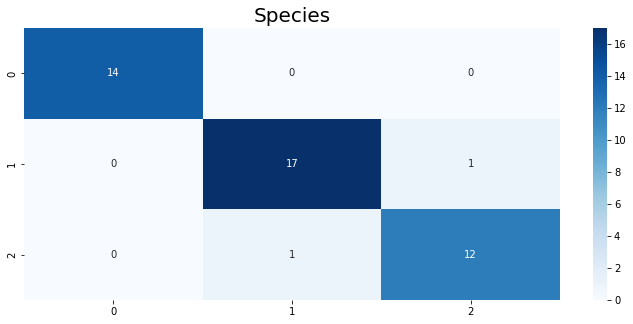

In [41]:
plt.figure(figsize=(12,5))
sns.heatmap(cf1,fmt='g',cmap='Blues',annot=True)
plt.title('Species',fontsize=20)
plt.show